Build a model which predicts type of accidents

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
#define the dataset directory
dataset_dir = r"C:\Users\porje\OneDrive\Desktop\internship jb infotech\CNN\accident detection\data_set"

In [3]:
# Create an ImageDataGenerator object with various augmentation options
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=40,            # Randomly rotate the image
    width_shift_range=0.2,        # Randomly shift the image horizontally
    height_shift_range=0.2,       # Randomly shift the image vertically
    shear_range=0.2,              # Randomly shear the image
    zoom_range=0.2,               # Randomly zoom in on the image
    horizontal_flip=True,         # Randomly flip the image horizontally
    fill_mode='nearest',          # Fill in pixels after a transformation
    validation_split=0.2
)


In [4]:
#create imagegenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#load training dataset
train_dataset = datagen.flow_from_directory(dataset_dir, target_size=(224,224), batch_size=32, class_mode='sparse', subset='training')

#load validation dataset
val_dataset = datagen.flow_from_directory(dataset_dir, target_size=(224,224), batch_size=32, class_mode='sparse', subset='validation')

Found 857 images belonging to 4 classes.
Found 213 images belonging to 4 classes.


In [2]:
from tensorflow.keras.models import load_model

model =  load_model(r'C:\Users\porje\OneDrive\Desktop\internship jb infotech\CNN\accident detection\accident_detection.h5')

In [50]:
#create model
model = tf.keras.Sequential( 
    [
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_dataset.num_classes, activation='softmax')
    ]
)

c:\Users\porje\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
#train model
model.fit(train_dataset,  validation_data=val_dataset,steps_per_epoch=train_dataset.samples//32, validation_steps=val_dataset.samples//32, epochs=10)

c:\Users\porje\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9501 - loss: 0.1651 - val_accuracy: 0.6458 - val_loss: 1.7558
Epoch 2/10
 1/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9688 - loss: 0.0893

c:\Users\porje\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9688 - loss: 0.0893 - val_accuracy: 0.6302 - val_loss: 1.8138
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 872ms/step - accuracy: 0.9677 - loss: 0.1073 - val_accuracy: 0.6823 - val_loss: 1.4561
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.6823 - val_loss: 1.4330
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 956ms/step - accuracy: 0.9978 - loss: 0.0215 - val_accuracy: 0.7083 - val_loss: 1.3483
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.7135 - val_loss: 1.3297
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.7083 - val_loss: 1.5394
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.6927 - val_loss: 1.5332
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.7083 - val_loss

In [9]:
model.save('accident_detection.h5')

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,600,774 (9.92 MB)

 Trainable params: 2,600,772 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(labels)  # labels are in sparse integer format already
    y_pred.extend(np.argmax(preds, axis=1))

    if len(y_true) >= val_dataset.samples:
        break  # Stop after one pass over validation data

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


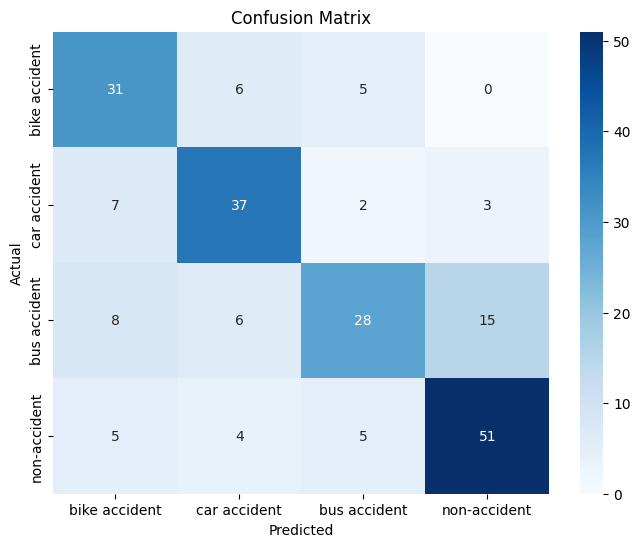

Classification Report:

               precision    recall  f1-score   support

bike accident       0.61      0.74      0.67        42
 car accident       0.70      0.76      0.73        49
 bus accident       0.70      0.49      0.58        57
 non-accident       0.74      0.78      0.76        65

     accuracy                           0.69       213
    macro avg       0.69      0.69      0.68       213
 weighted avg       0.69      0.69      0.69       213



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class labels
class_names = ['bike accident', 'car accident', 'bus accident', 'non-accident']

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [11]:
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1-score (weighted): {f1:.2f}")


Accuracy: 0.69
Precision (weighted): 0.69
Recall (weighted): 0.69
F1-score (weighted): 0.69


In [1]:
import numpy as np

# Example confusion matrix from your heatmap
conf_matrix = np.array([
    [31, 6, 5, 0],   # bike accident
    [7, 37, 2, 3],   # car accident
    [8, 6, 28, 15],  # bus accident
    [5, 4, 5, 51]    # non-accident
])

# Class labels
class_names = ["bike accident", "car accident", "bus accident", "non-accident"]

# Calculate and print class-wise accuracy
for i, class_name in enumerate(class_names):
    true_positive = conf_matrix[i][i]
    total_actual = np.sum(conf_matrix[i])
    accuracy = true_positive / total_actual
    print(f"{class_name}: {accuracy:.2%} accuracy")


bike accident: 73.81% accuracy
car accident: 75.51% accuracy
bus accident: 49.12% accuracy
non-accident: 78.46% accuracy
